<a href="https://colab.research.google.com/github/Jaeger47/DACER-OBJECT-DETECTION/blob/main/Dacer_Object_Detection_Training_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dacer Object Detection Training using yolov8**

---



# **Install Yolov8**
YOLOv8 is the newest state-of-the-art YOLO model that can be used for object detection, image classification, and instance segmentation tasks. YOLOv8 was developed by Ultralytics, who also created the influential and industry-defining YOLOv5 model. YOLOv8 includes numerous architectural and developer experience changes and improvements over YOLOv5.

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 10.5 MB/s eta 0:00:00


# **Test Yolov8**
YOLOv8 comes with a command line interface that lets you train, validate or infer models on various tasks and versions. The CLI requires no customization or code. You can run all tasks from the terminal. Usage is fairly similar to the scripts we are familiar with. The example below shows how to leverage the CLI to detect objects in a given image.

In [49]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://buksu.edu.ph/wp-content/uploads/2023/04/336547198_886241662429064_3912551224669042670_n.jpg'

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Found https://buksu.edu.ph/wp-content/uploads/2023/04/336547198_886241662429064_3912551224669042670_n.jpg locally at 336547198_886241662429064_3912551224669042670_n.jpg
image 1/1 /content/336547198_886241662429064_3912551224669042670_n.jpg: 416x640 19 persons, 1 chair, 63.3ms
Speed: 2.5ms preprocess, 63.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


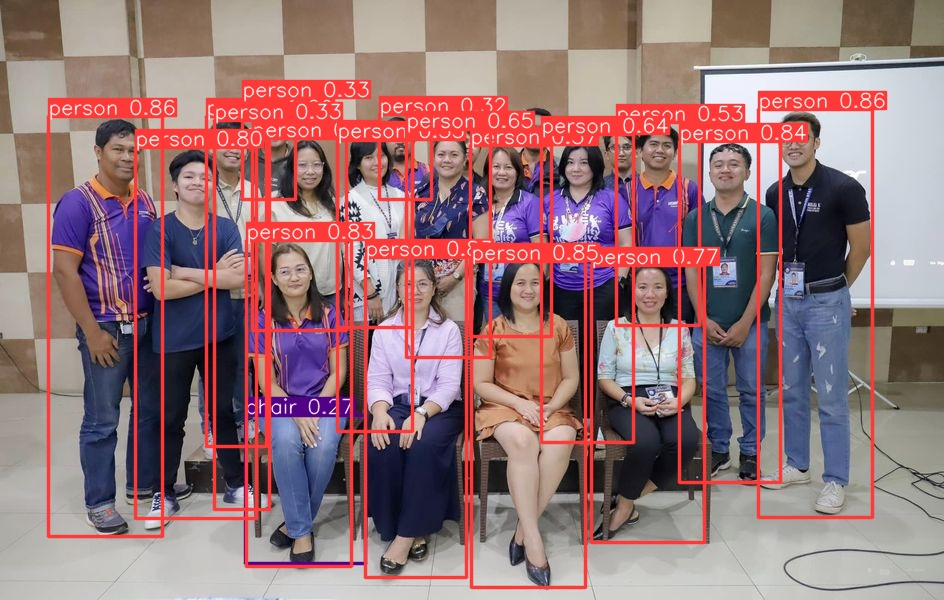

In [50]:
from IPython.display import display, Image
Image(filename='runs/detect/predict/336547198_886241662429064_3912551224669042670_n.jpg', height=500)

# **Import Dataset**
Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process straightforward.

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KDwygGUOctZMxCjPczhF")
project = rf.workspace("bukidnon-state-university").project("android-figurine")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=f759223928ad62fa5fa0a4c95692986b8300b8f172248a057096d17592249d7a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.107, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to android-figurine-1 in yolov8:: 100%|██████████| 156/156 [00:00<00:00, 2090.09it/s]


# **Train Model**
After pasting the dataset download snippet into your YOLOv8 Colab notebook, you are ready to begin the training process

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 63.9MB/s]
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/android-figurine-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

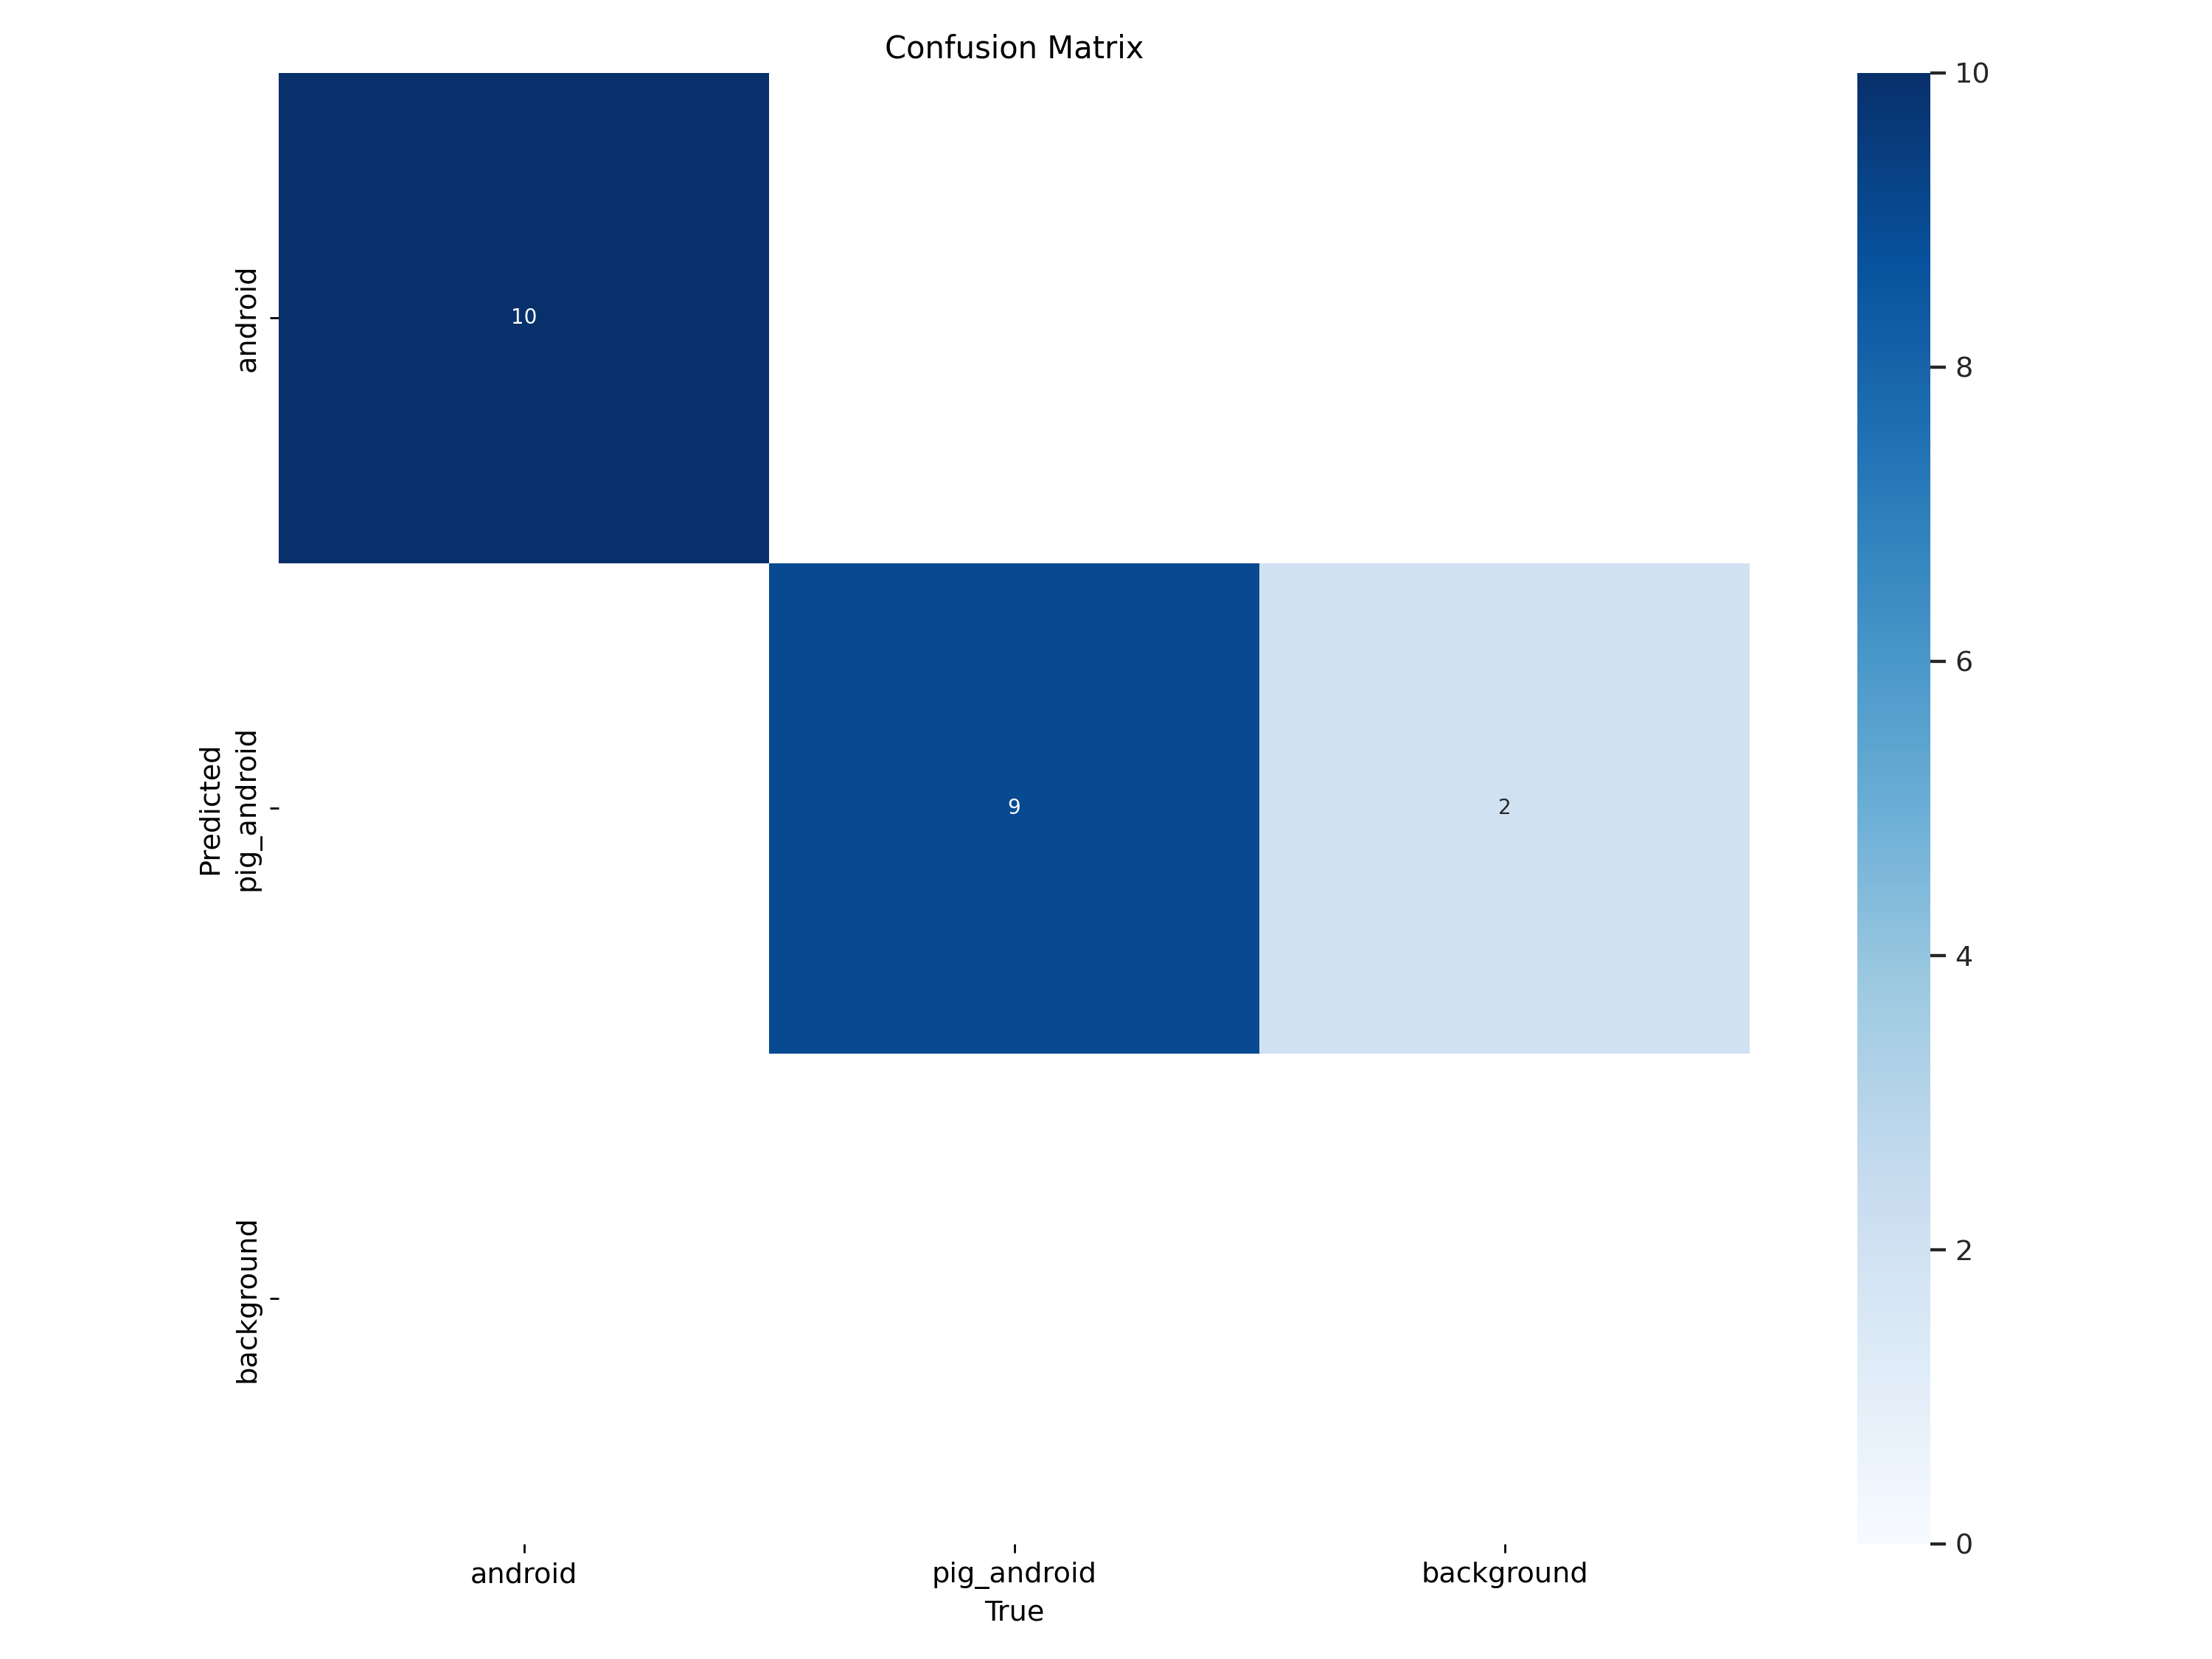

In [17]:
Image(filename='runs/detect/train/confusion_matrix.png', height=500)

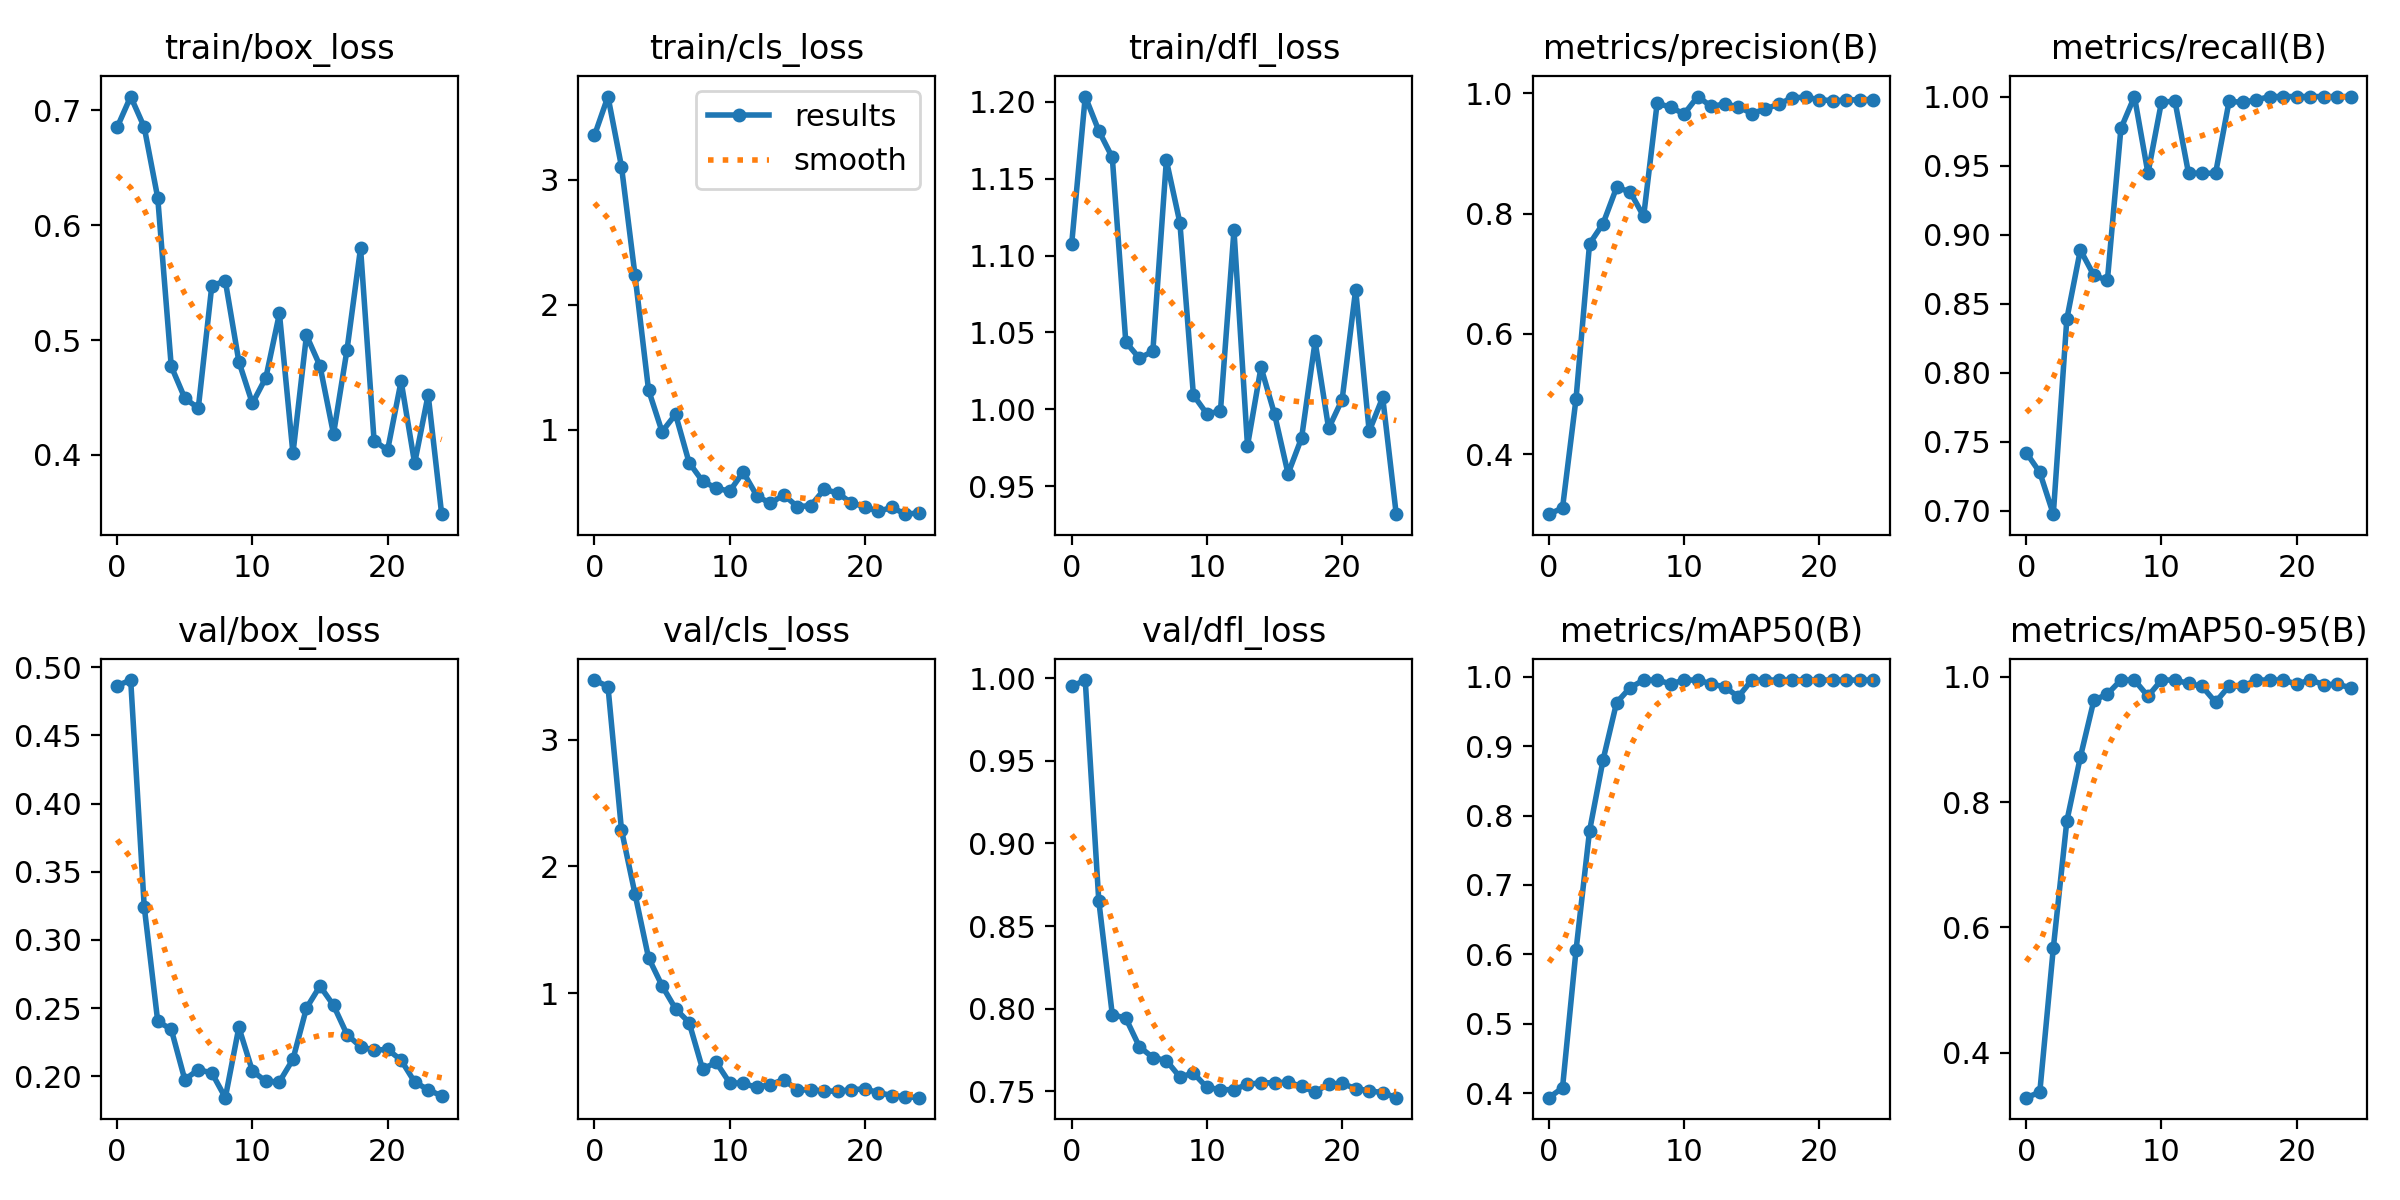

In [18]:
Image(filename='runs/detect/train/results.png', height=500)

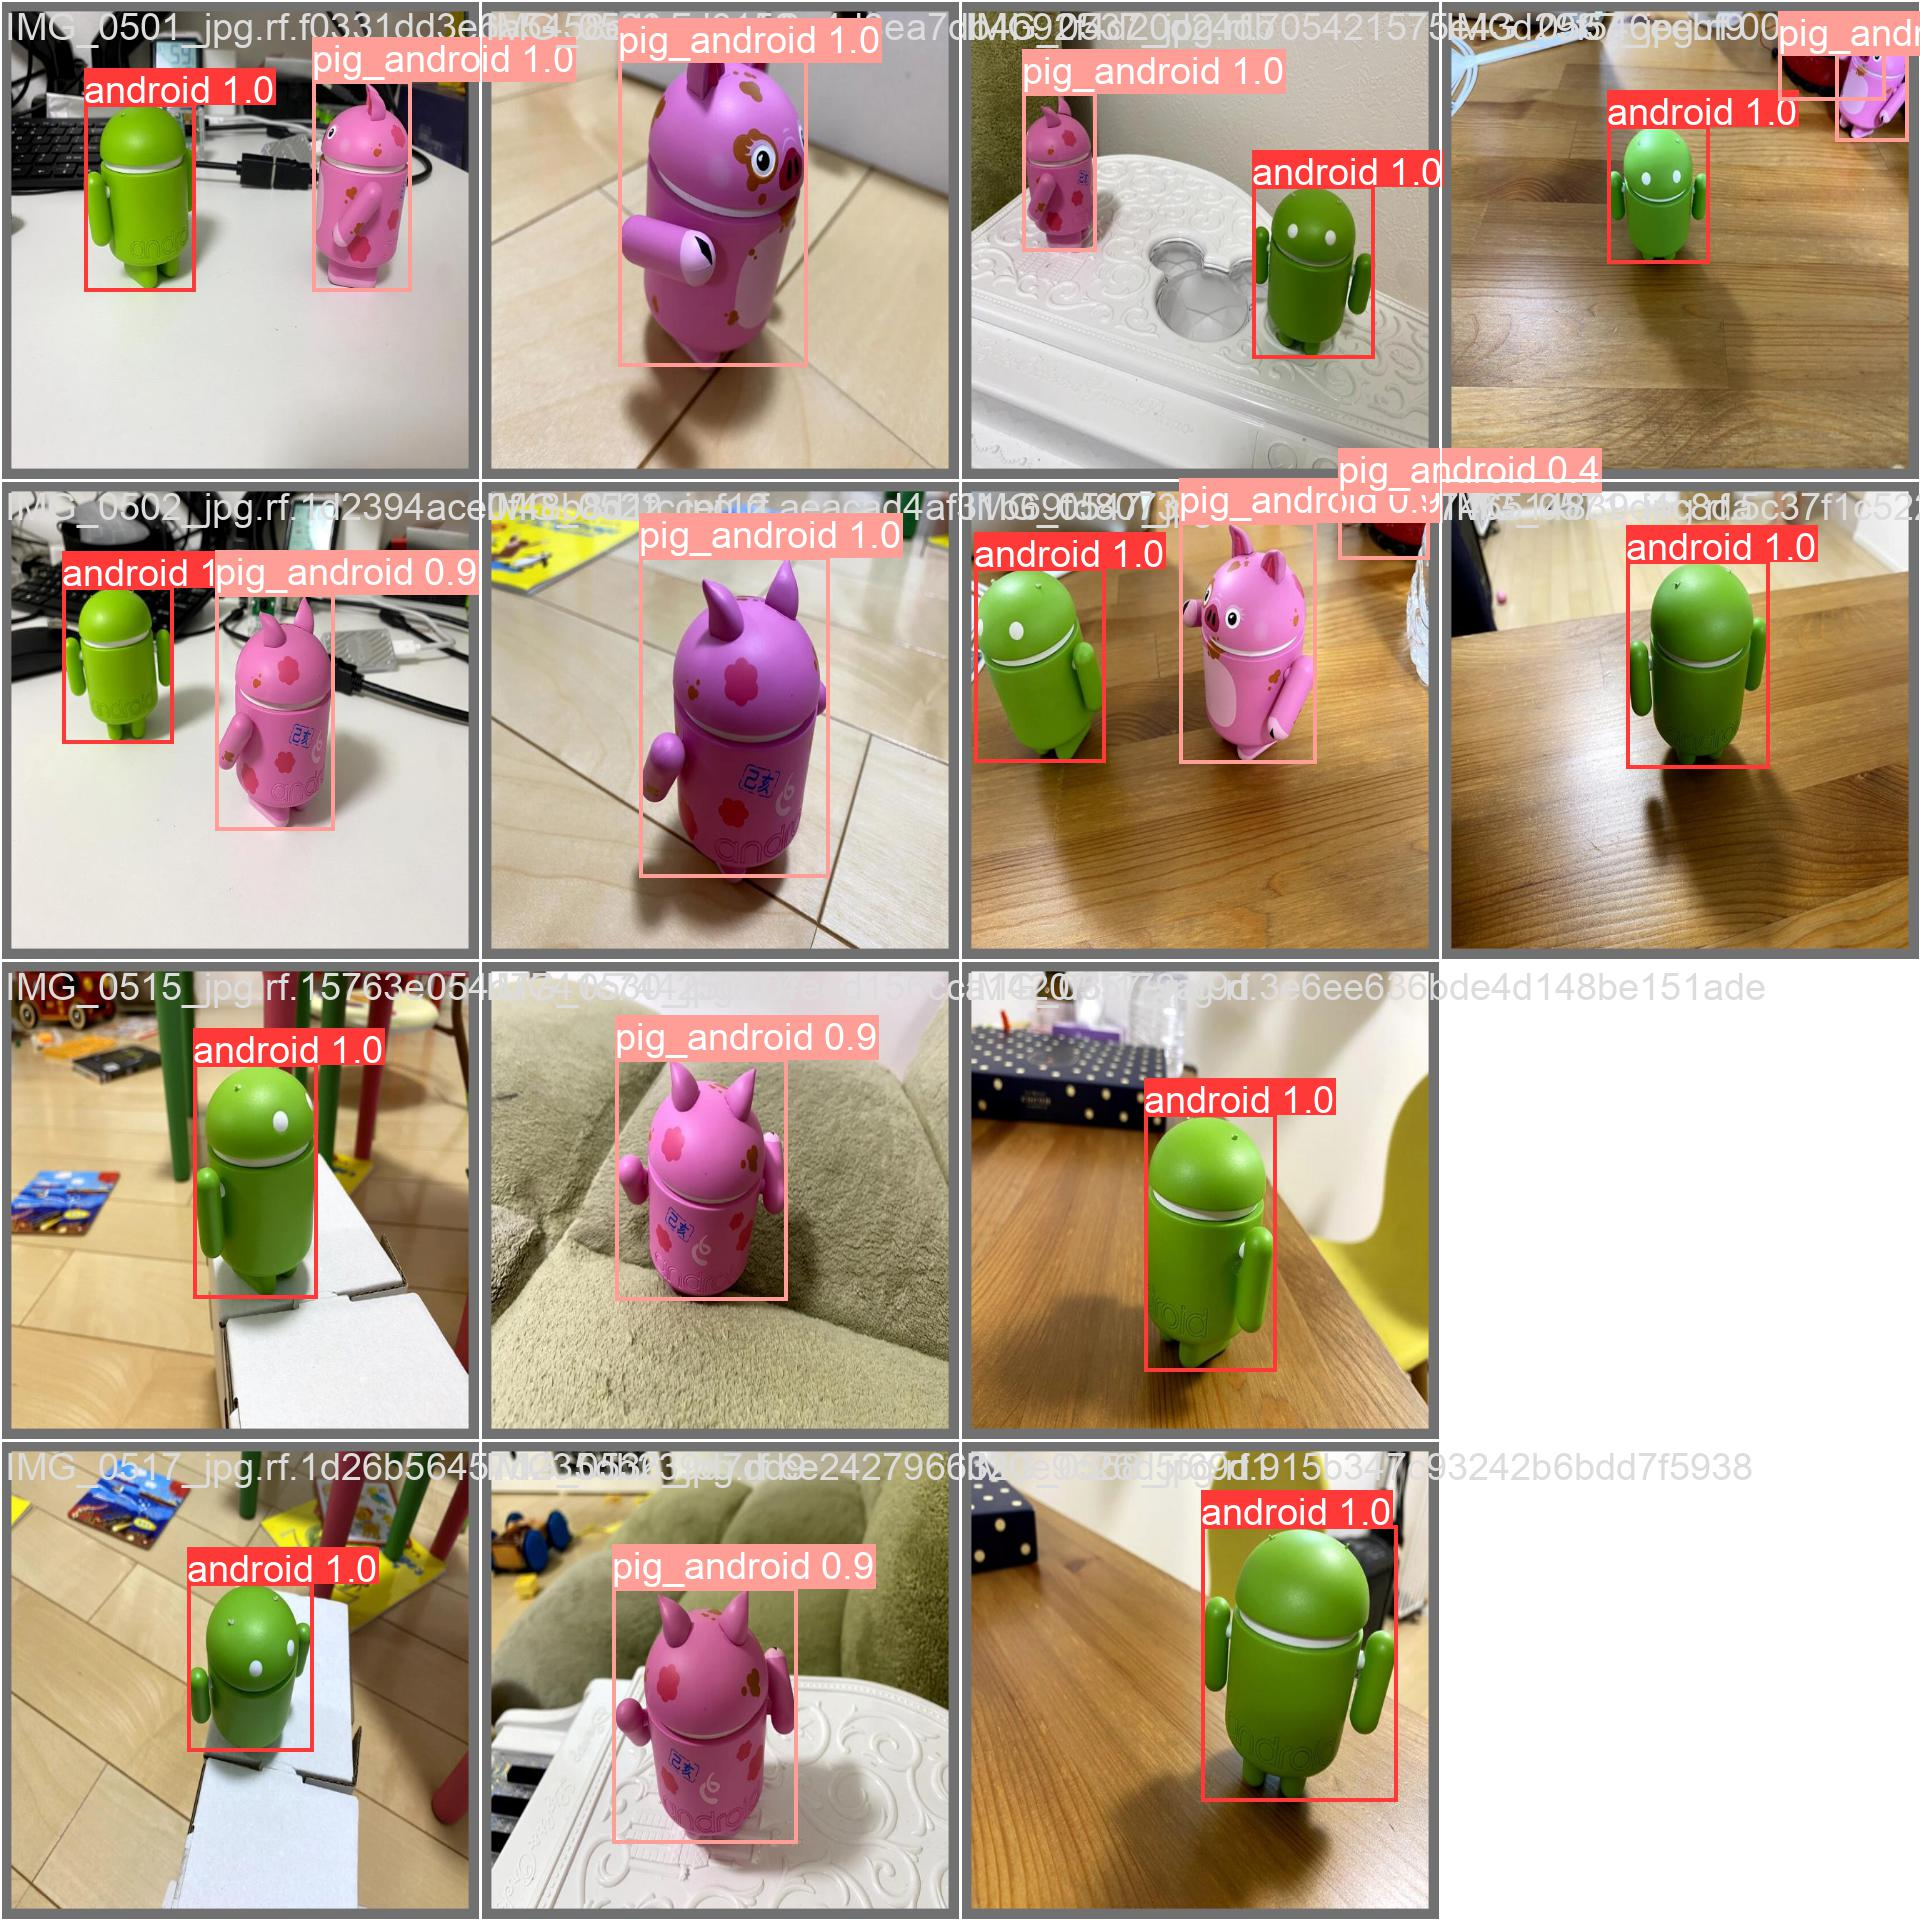

In [20]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', height=500)

# **Validate with a new model**
When the training is over, it is good practice to validate the new model on images it has not seen before. Therefore, when creating a dataset, we divide it into three parts, and one of them that we will use now as a test dataset.

In [21]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/android-figurine-1/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.11it/s]
                   all         14         19      0.987          1      0.995      0.995
               android         14         10      0.984          1      0.995      0.995
           pig_android         14          9      0.991          1      0.995      0.995
Speed: 0.2ms preprocess, 15.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val


In [24]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.60 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/7 /content/android-figurine-1/test/images/IMG_0509_jpg.rf.bd8a0c2e23ad87858d8bc51fc7c9ad1f.jpg: 640x640 1 android, 1 pig_android, 17.0ms
image 2/7 /content/android-figurine-1/test/images/IMG_0512_jpg.rf.6f2d91d9964f2640857fc1b9c22ee1b1.jpg: 640x640 1 android, 1 pig_android, 16.2ms
image 3/7 /content/android-figurine-1/test/images/IMG_0523_jpg.rf.dc34907b4a5b447e4fac2235d13bb7dd.jpg: 640x640 1 android, 1 pig_android, 16.2ms
image 4/7 /content/android-figurine-1/test/images/IMG_0531_jpg.rf.d1e429d2f3bfada1f44f2a6a52da5872.jpg: 640x640 1 pig_android, 16.3ms
image 5/7 /content/android-figurine-1/test/images/IMG_0545_jpg.rf.b0332af331c8f6337fd7b069105dfdf3.jpg: 640x640 1 android, 16.2ms
image 6/7 /content/android-figurine-1/test/images/IMG_0552_jpg.rf.41c3aaadc8a7162babeed4f6fbd3ac2d.jpg: 640x640 1 android, 1 pig_android, 14.7ms

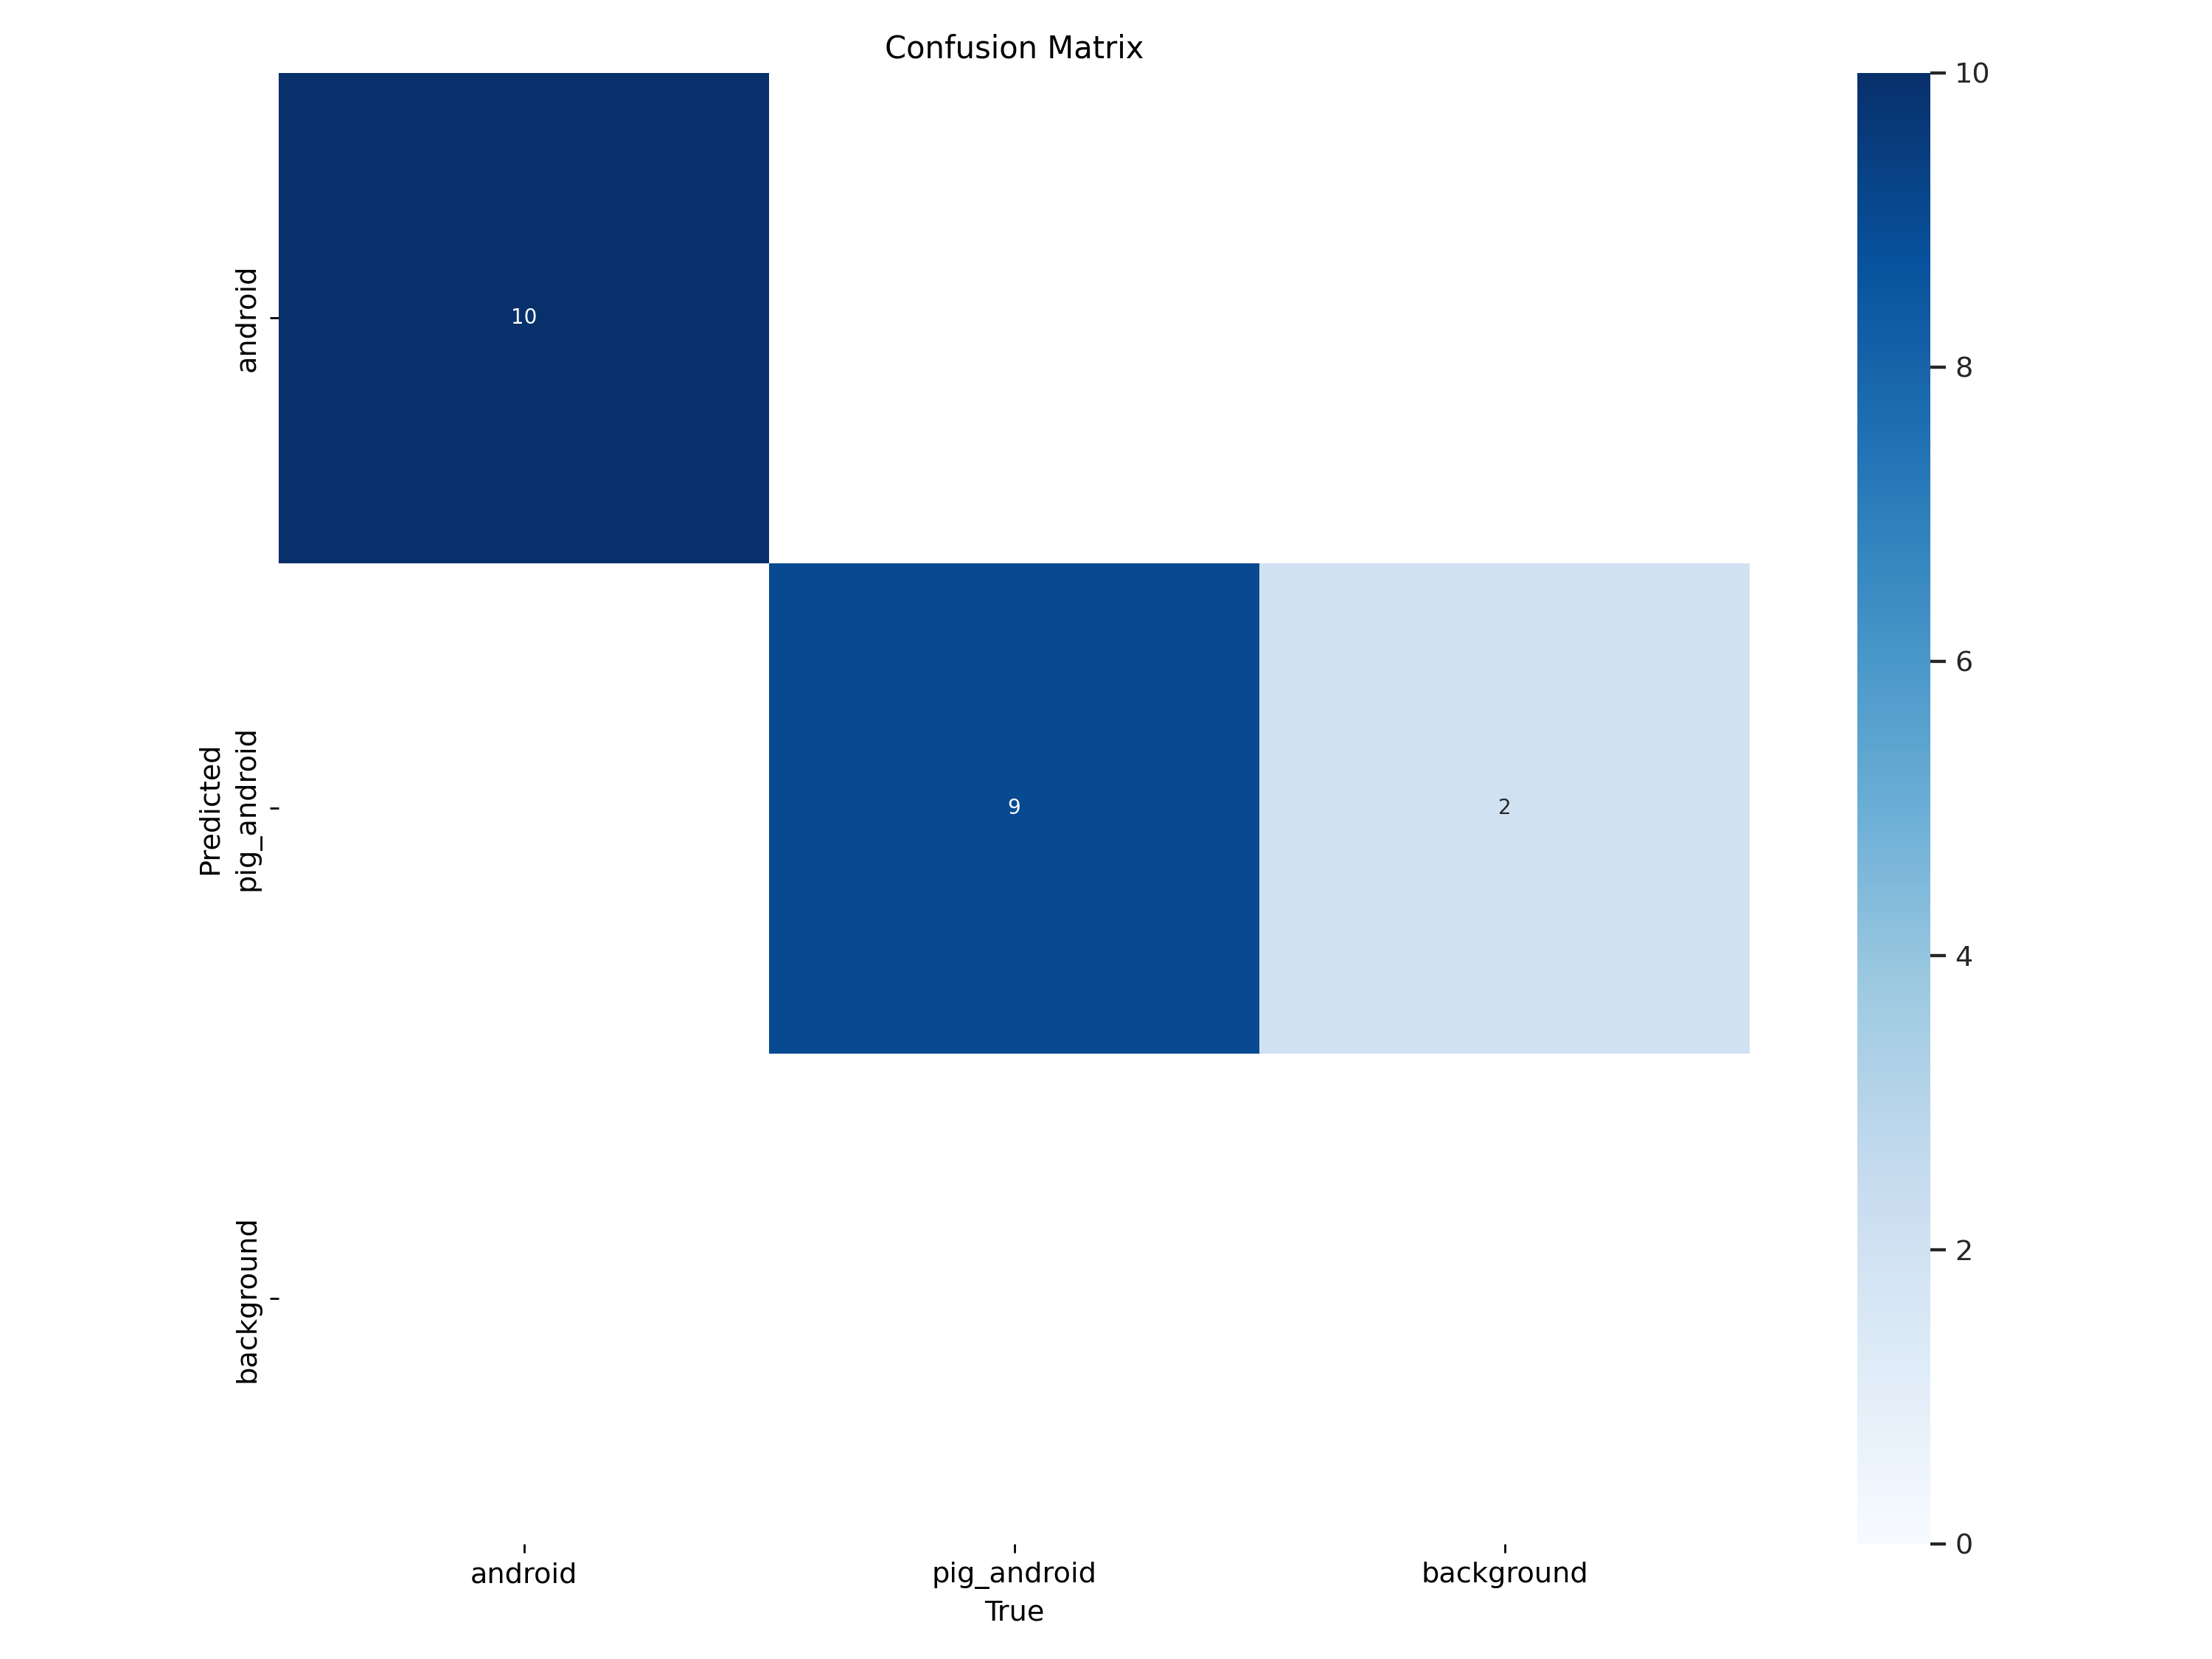

In [32]:
Image(filename='runs/detect/val/confusion_matrix.png', height=500)

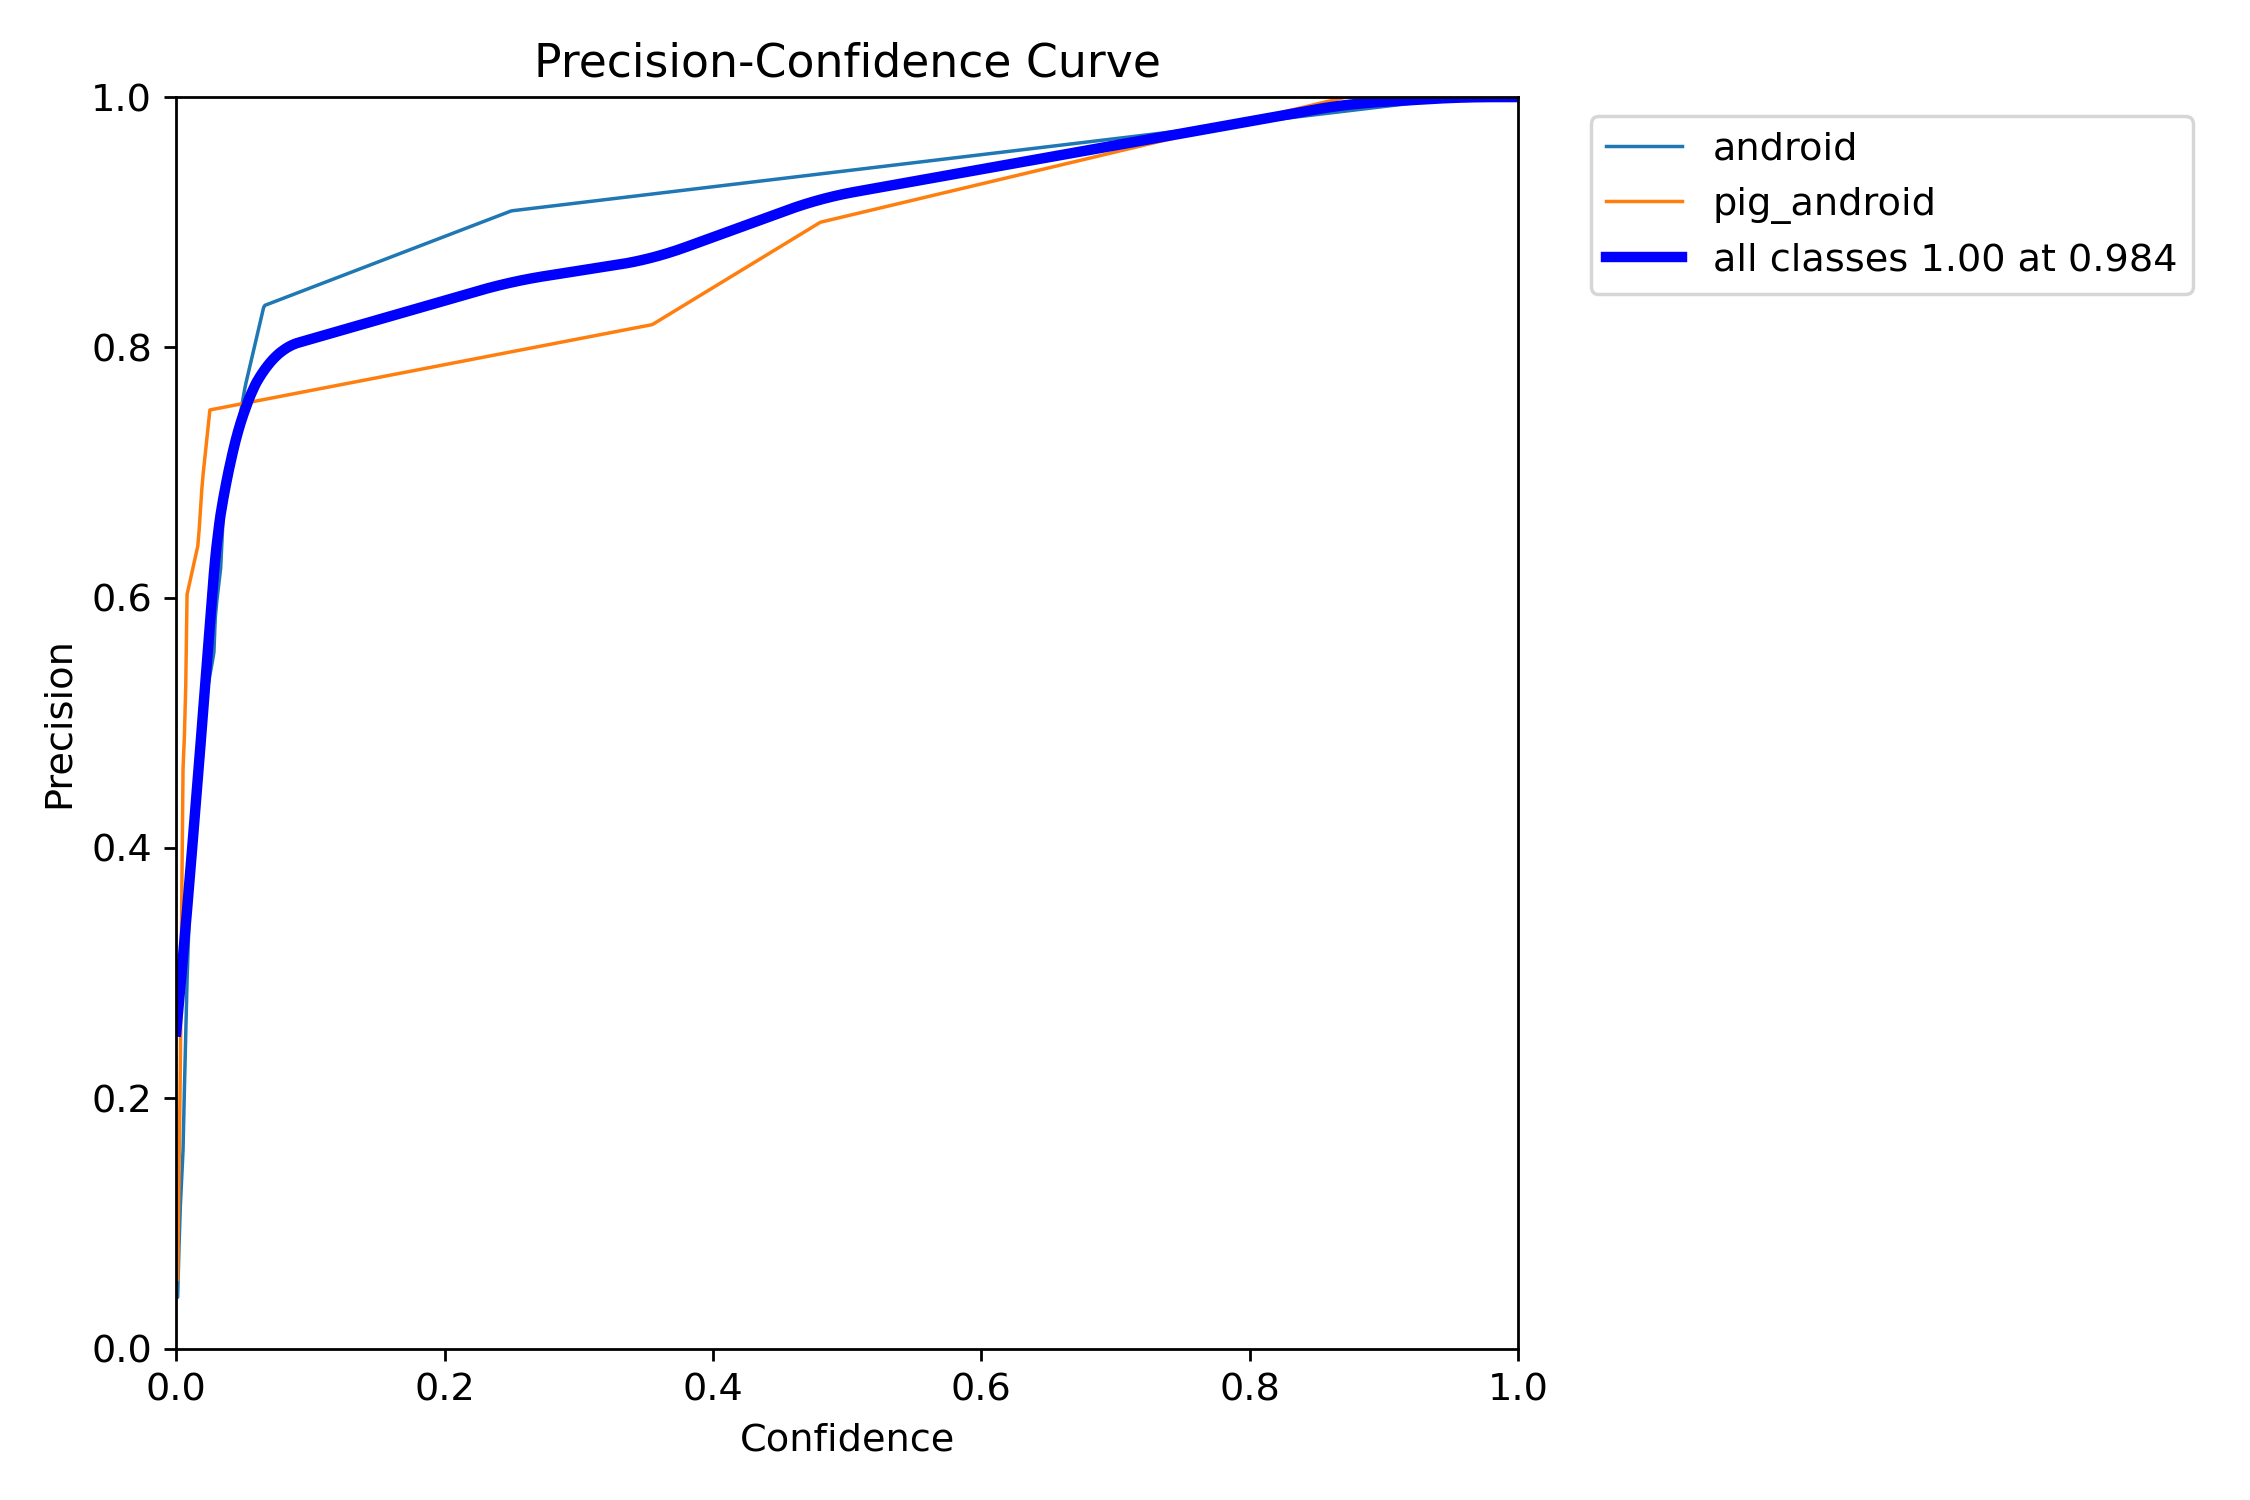

In [35]:
Image(filename='runs/detect/val/P_curve.png', height=500)

**# Predict with a your custom model**


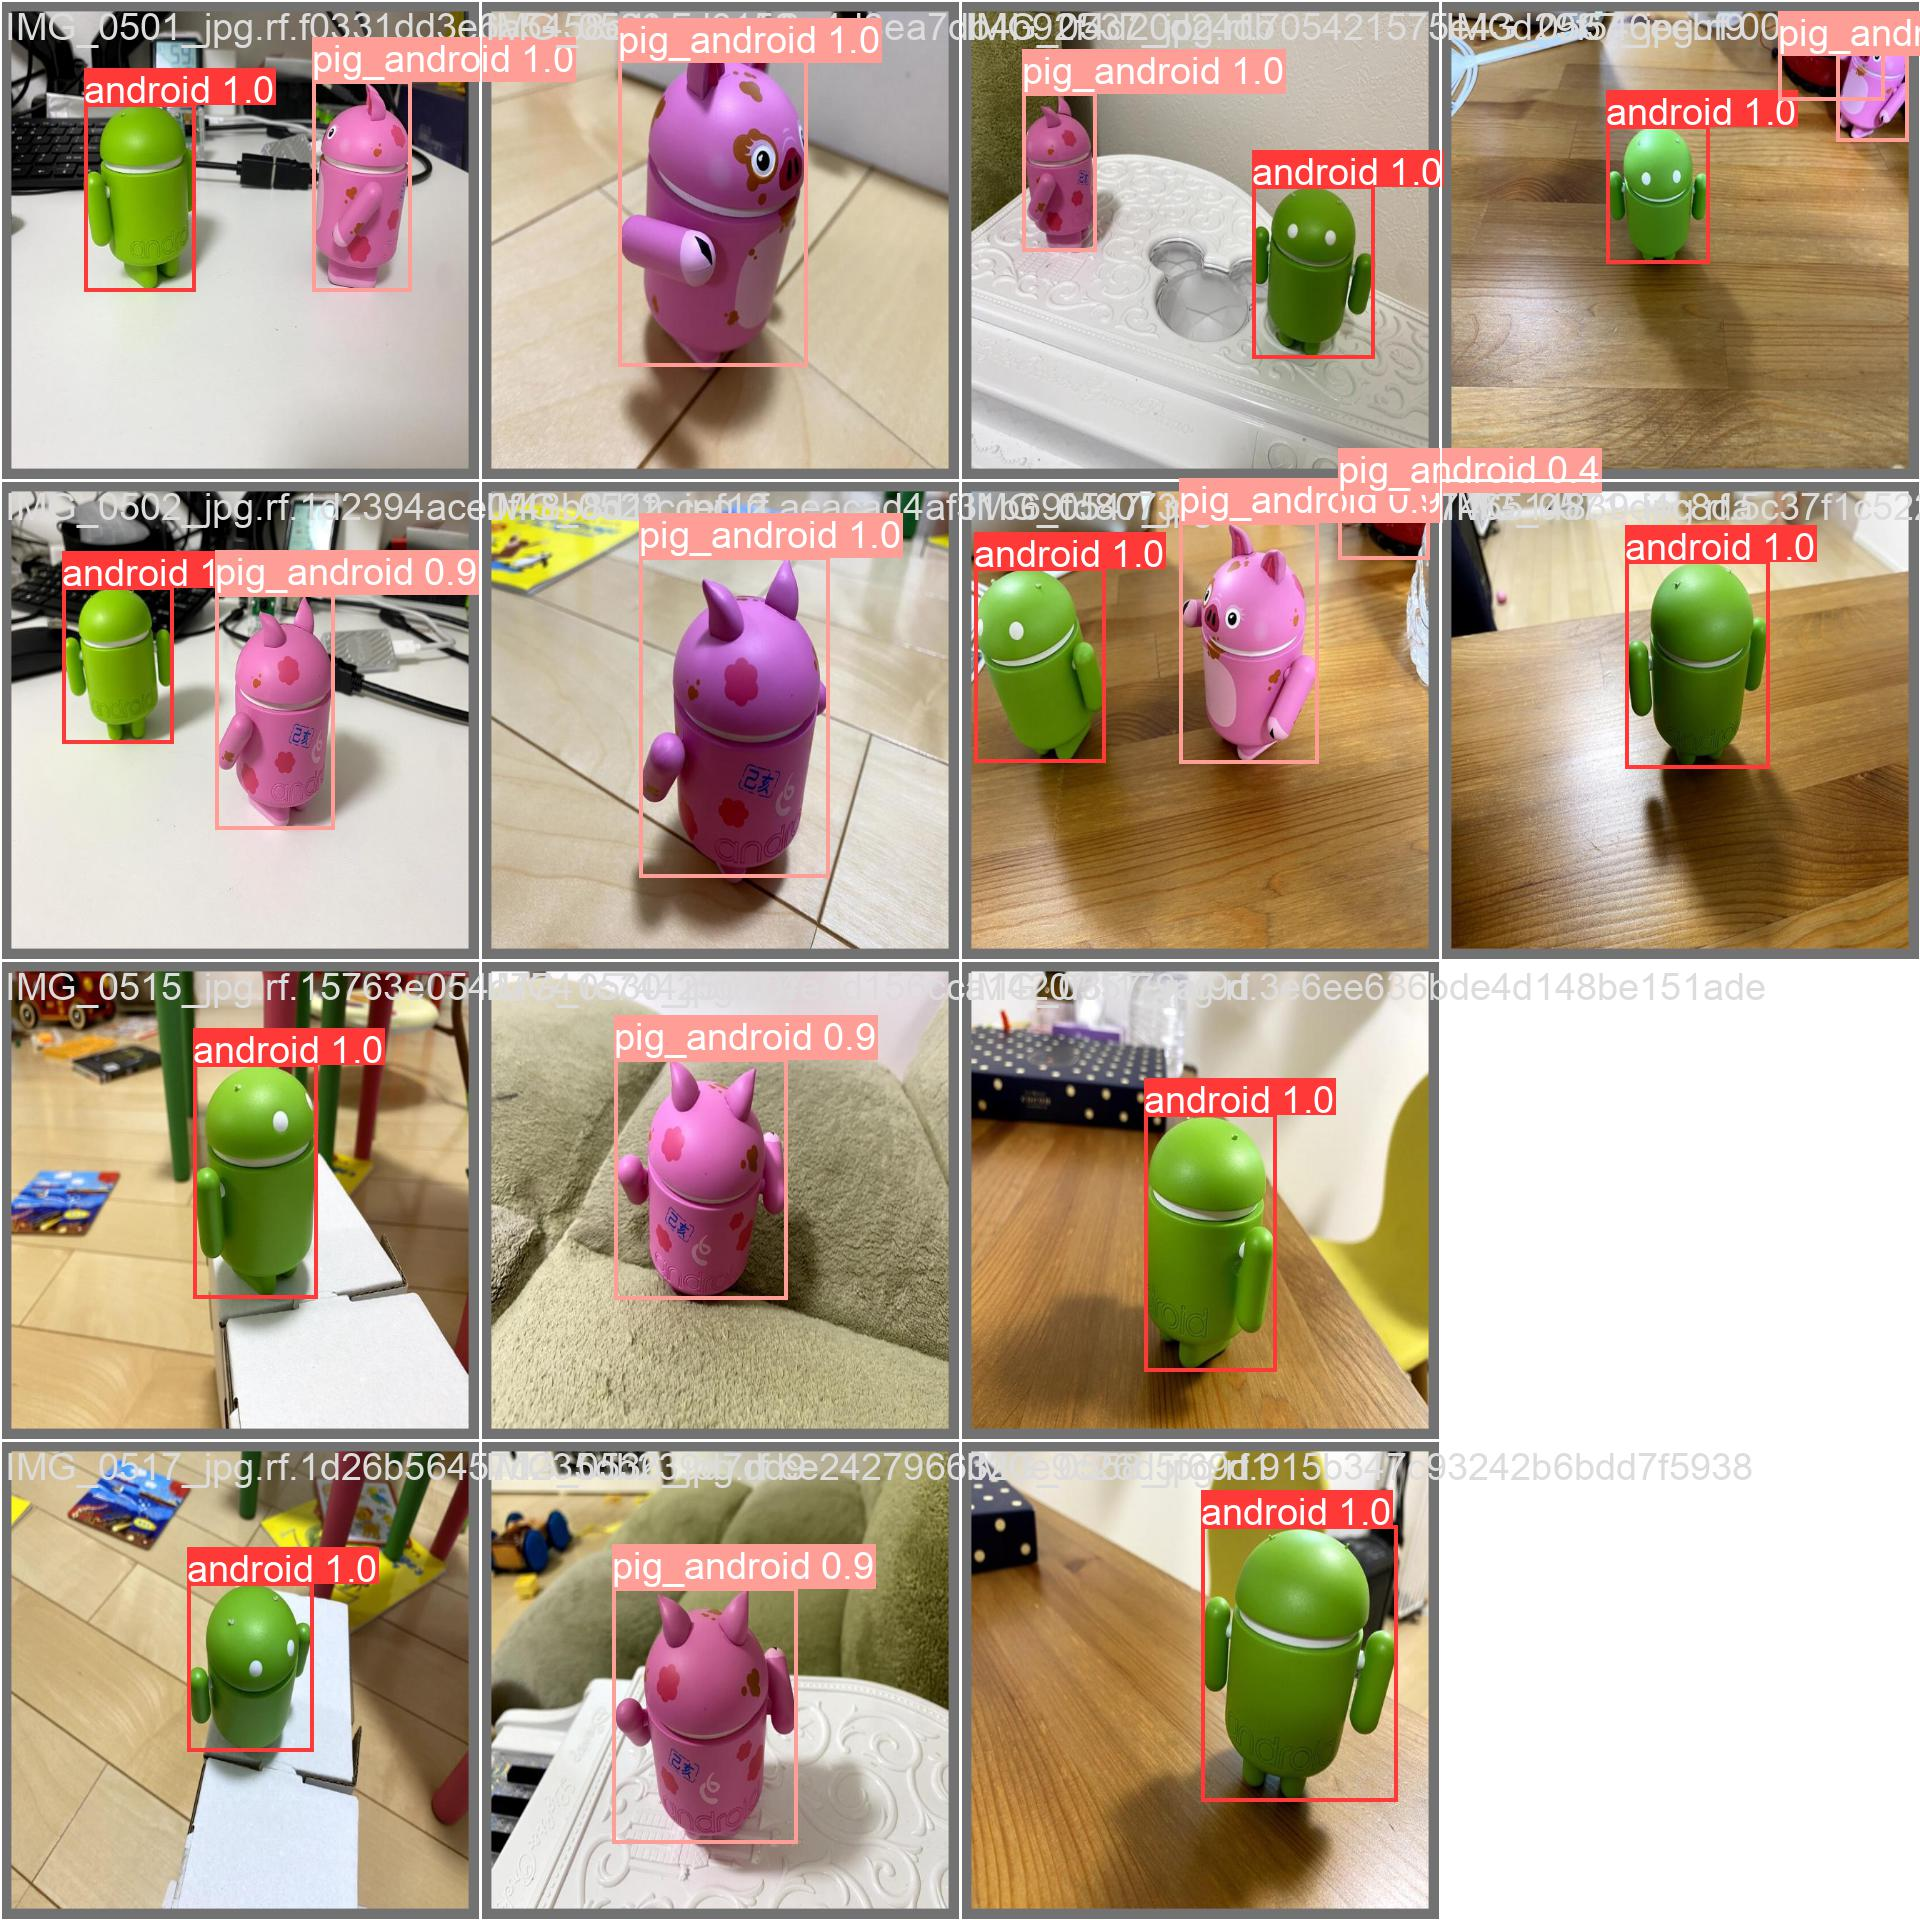

In [33]:
Image(filename='runs/detect/val/val_batch0_pred.jpg', height=500)

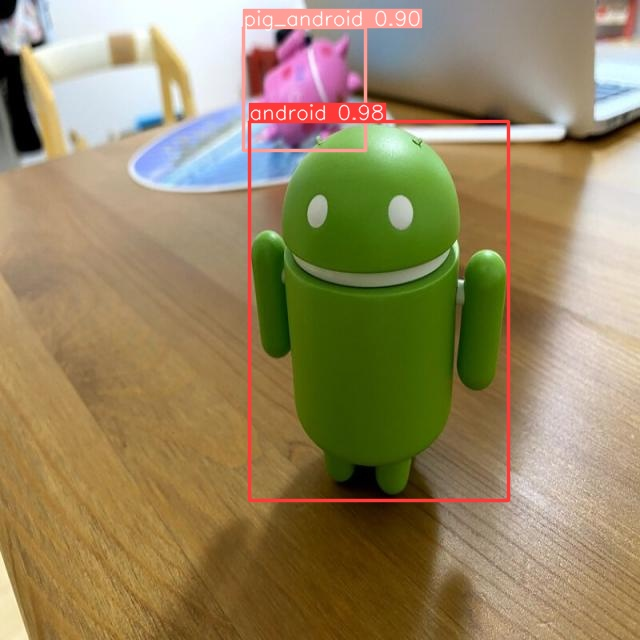

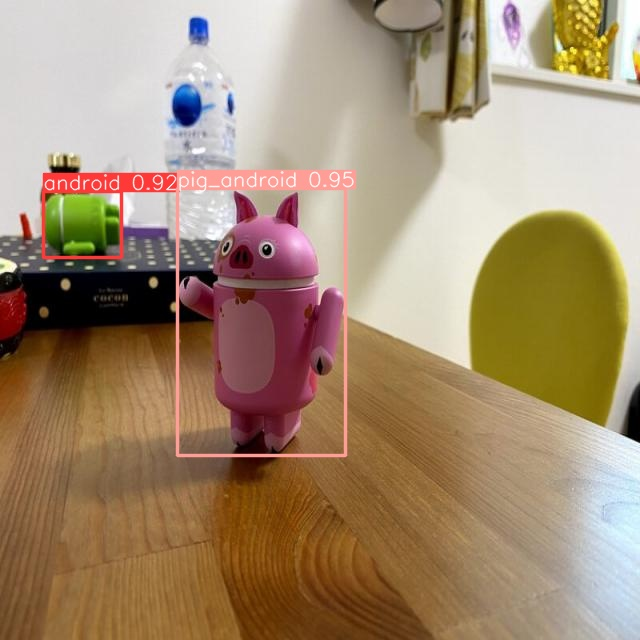

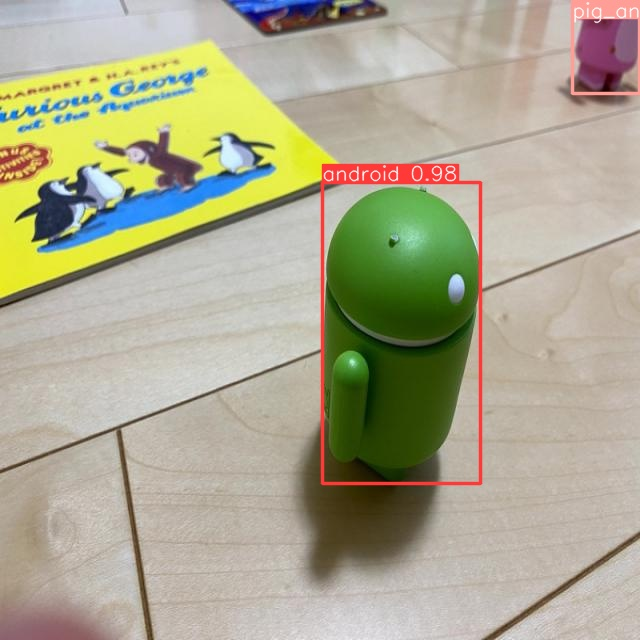

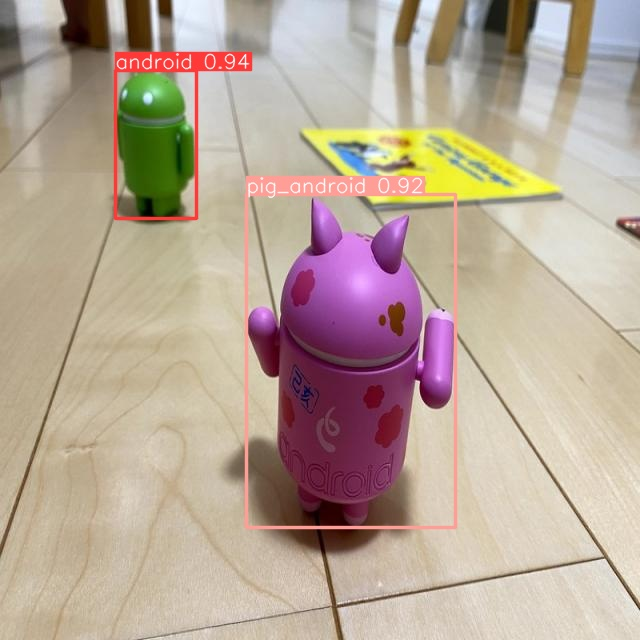

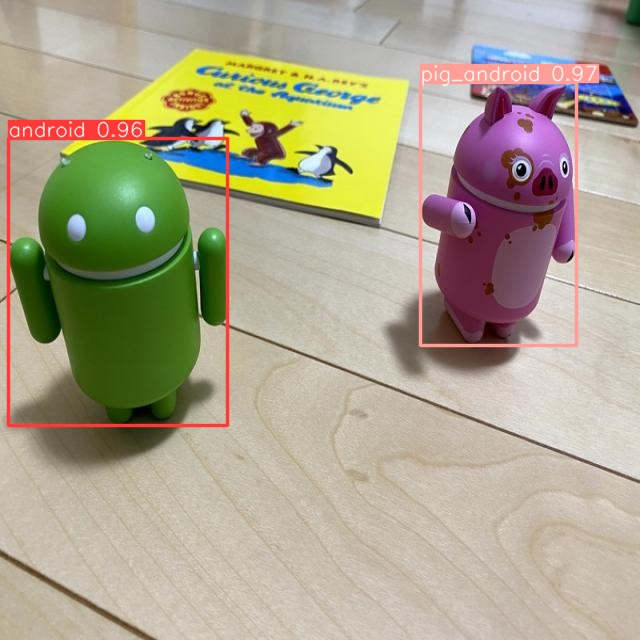

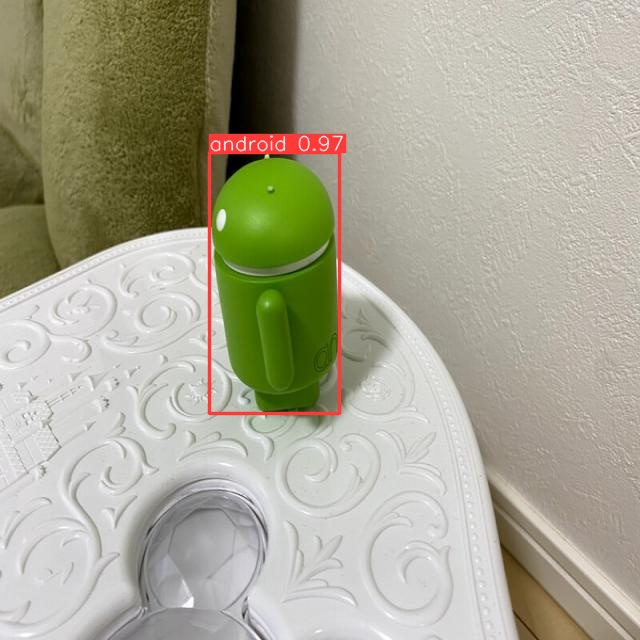

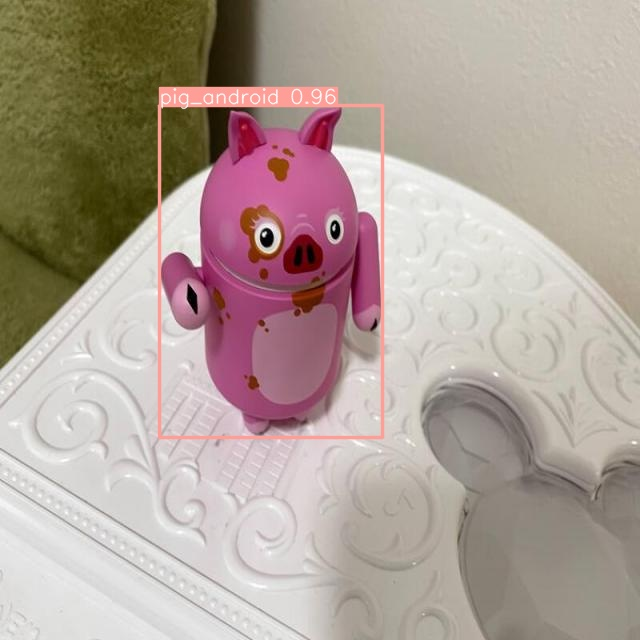

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:7]:
      display(Image(filename=image_path, width=300))
      print("\n")